The perpouse of the project is to create cousal graph based on the data that we get from the server

the data is in data folder in following format 

```
,A,B,C,D
0,3.4603236672637316,0.7416820273803358,2.4619499896450376,2.718641639883396
1,-0.4966130241483746,-0.05449489092162163,-0.9716986896853619,0.557881866773247
2,1.3604913016493632,0.3600766013374175,0.2785077774980029,3.0004147003119455
```



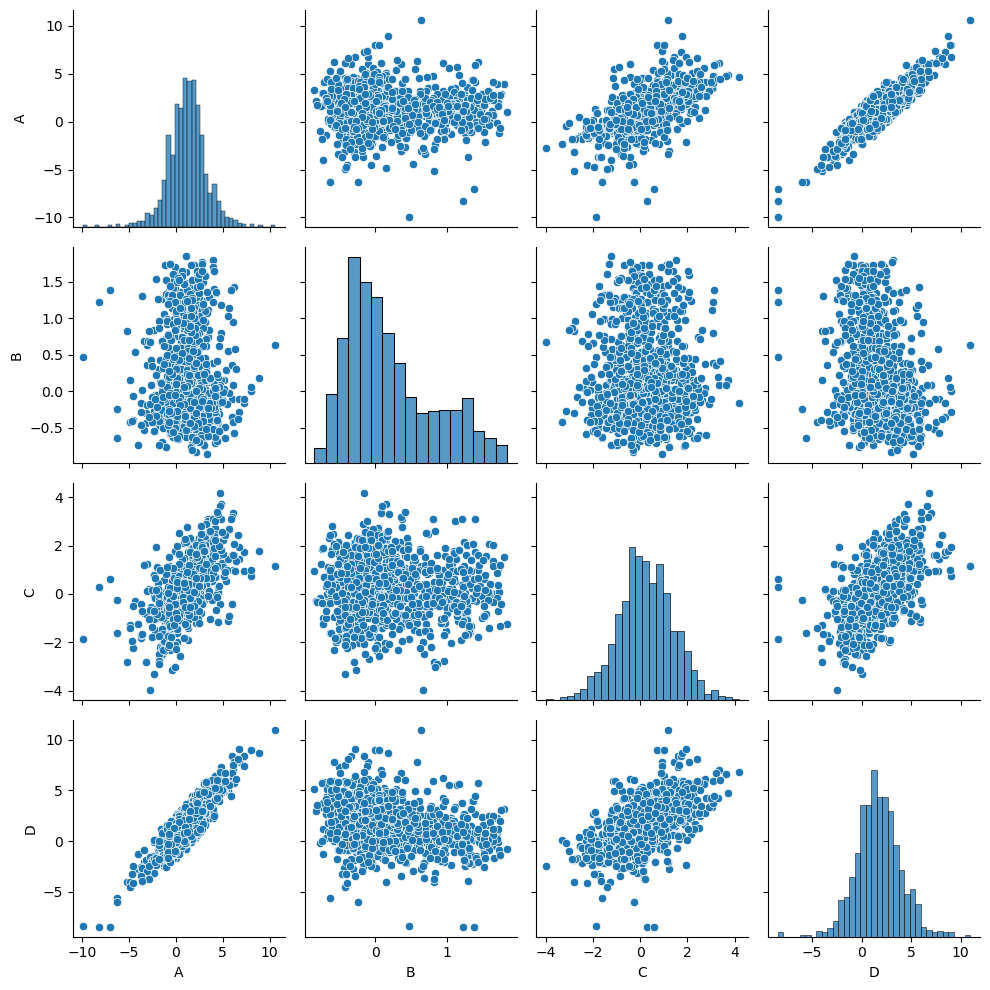

In [3]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# adjust the path/filename as needed
df = pd.read_csv('data/data_1269.csv', index_col=0)

# seaborn pairplot automatically adapts to however many numeric columns you have
sns.pairplot(df)
plt.tight_layout()
plt.show()

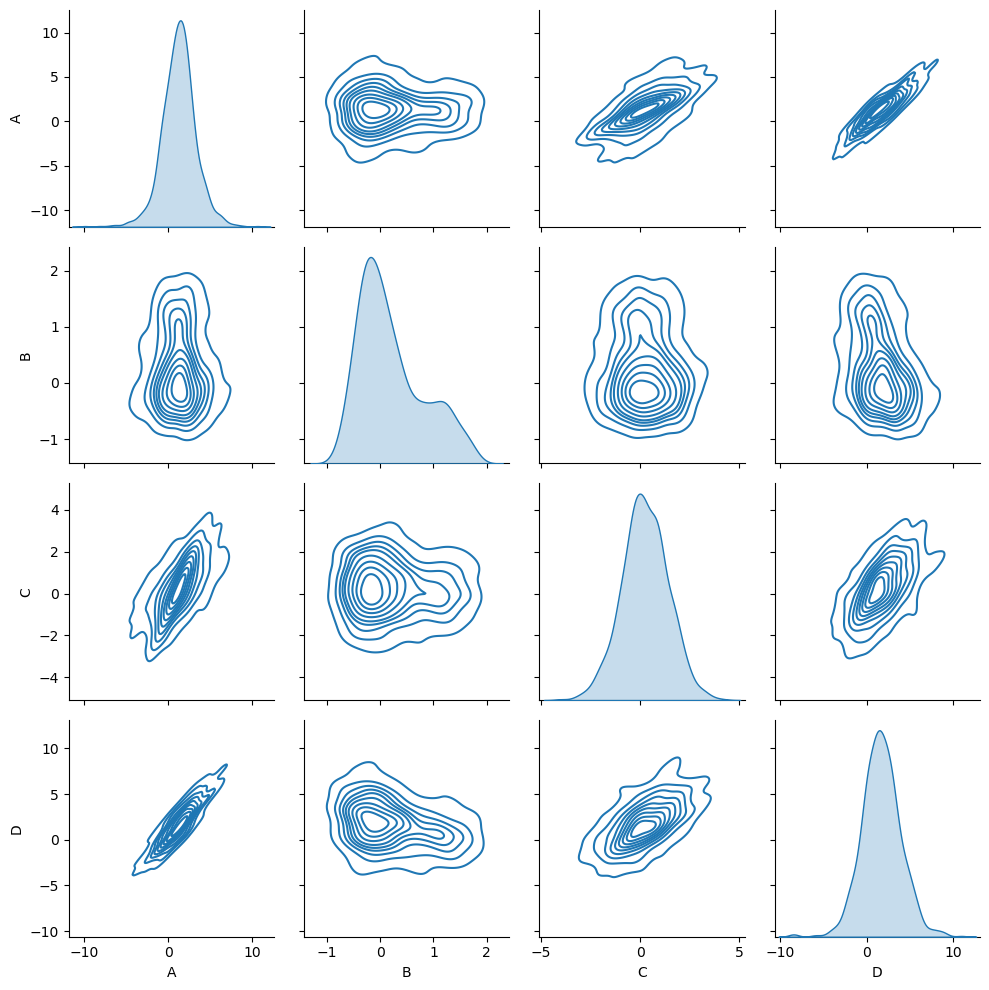

In [4]:
sns.pairplot(df, kind='kde')
plt.tight_layout()
plt.show()

In [5]:
# Compute mean and variance for each column
stats = pd.DataFrame({
    'mean':    df.mean(),
    'variance': df.var()
})

# Estimate noise as std of first differences
noise_diff = df.diff().std()

# Estimate noise via deviations from a rolling mean
rolling_mean = df.rolling(window=10, center=True).mean()
noise_rolling = (df - rolling_mean).std()

# Aggregate noise estimates
stats['noise_std_diff'] = noise_diff
stats['noise_std_rolling'] = noise_rolling

stats

,mean,variance,noise_std_diff,noise_std_rolling
A,1.218938,4.186953,2.879601,1.960016
B,0.202071,0.373238,0.873882,0.585553
C,0.239678,1.361532,1.649926,1.122590
D,1.682867,5.139261,3.226223,2.162665


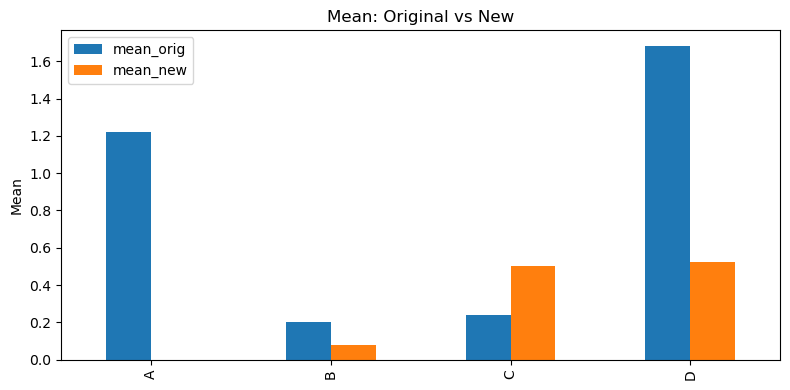

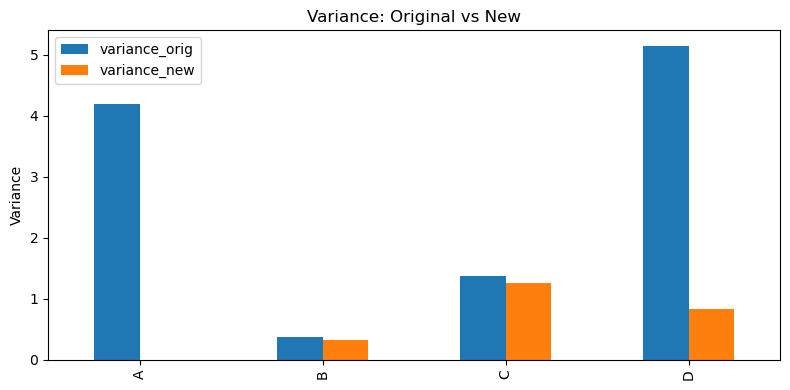

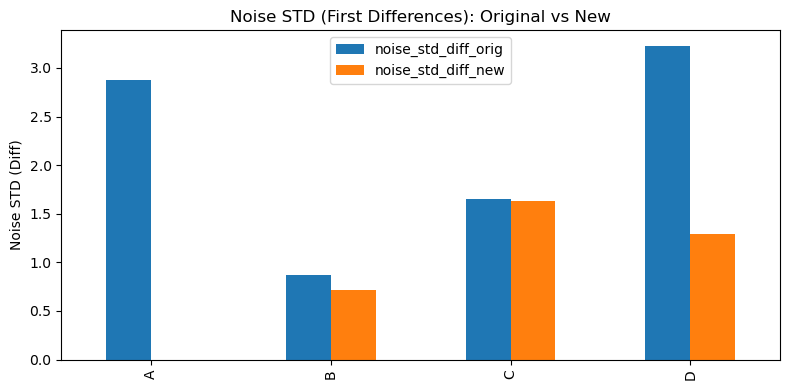

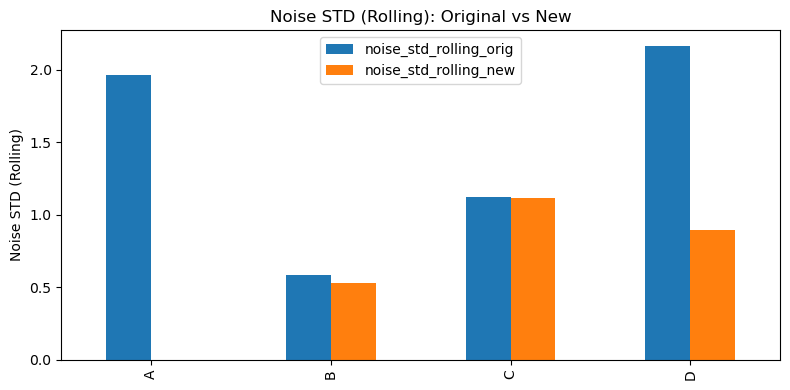

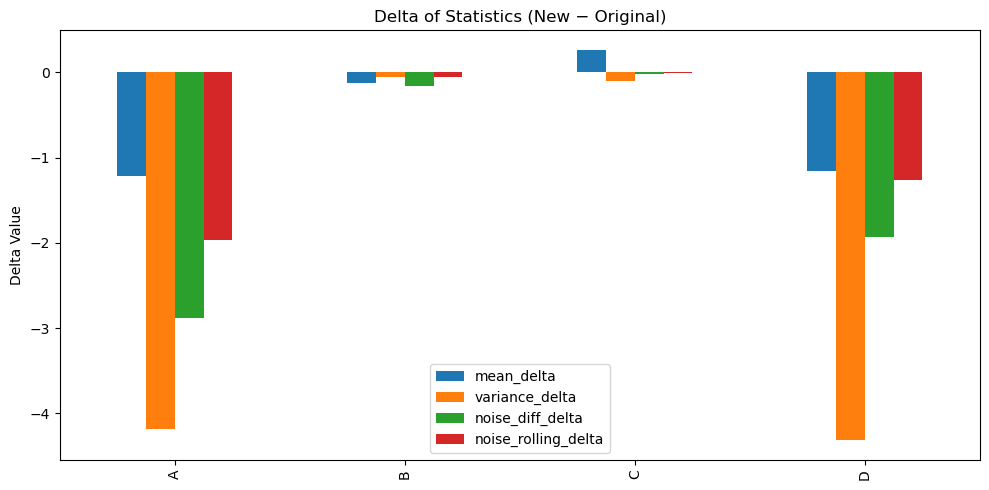

In [7]:
# Load the post‑intervention data
df_new = pd.read_csv('data/data_1292.csv', index_col=0)

# Compute the same set of summary statistics for the new data
stats_new = pd.DataFrame({
    'mean':     df_new.mean(),
    'variance': df_new.var()
})
noise_diff_new    = df_new.diff().std()
rolling_mean_new  = df_new.rolling(window=10, center=True).mean()
noise_rolling_new = (df_new - rolling_mean_new).std()

stats_new['noise_std_diff']    = noise_diff_new
stats_new['noise_std_rolling'] = noise_rolling_new

# Combine original and new stats side by side
compare_stats = pd.concat(
    [ stats.add_suffix('_orig'),
      stats_new.add_suffix('_new') ],
    axis=1
)

# Optionally, compute deltas
compare_stats['mean_delta']          = compare_stats['mean_new'] - compare_stats['mean_orig']
compare_stats['variance_delta']      = compare_stats['variance_new'] - compare_stats['variance_orig']
compare_stats['noise_diff_delta']    = compare_stats['noise_std_diff_new'] - compare_stats['noise_std_diff_orig']
compare_stats['noise_rolling_delta'] = compare_stats['noise_std_rolling_new'] - compare_stats['noise_std_rolling_orig']

compare_stats


# Plot side‑by‑side comparisons of original vs new statistics
compare_stats[['mean_orig','mean_new']].plot(kind='bar', figsize=(8,4))
plt.title('Mean: Original vs New')
plt.ylabel('Mean')
plt.tight_layout()
plt.show()

compare_stats[['variance_orig','variance_new']].plot(kind='bar', figsize=(8,4))
plt.title('Variance: Original vs New')
plt.ylabel('Variance')
plt.tight_layout()
plt.show()

compare_stats[['noise_std_diff_orig','noise_std_diff_new']].plot(kind='bar', figsize=(8,4))
plt.title('Noise STD (First Differences): Original vs New')
plt.ylabel('Noise STD (Diff)')
plt.tight_layout()
plt.show()

compare_stats[['noise_std_rolling_orig','noise_std_rolling_new']].plot(kind='bar', figsize=(8,4))
plt.title('Noise STD (Rolling): Original vs New')
plt.ylabel('Noise STD (Rolling)')
plt.tight_layout()
plt.show()

# Plot the deltas for an at‑a‑glance view of change
compare_stats[['mean_delta','variance_delta','noise_diff_delta','noise_rolling_delta']].plot(
    kind='bar', figsize=(10,5)
)
plt.title('Delta of Statistics (New − Original)')
plt.ylabel('Delta Value')
plt.tight_layout()
plt.show()

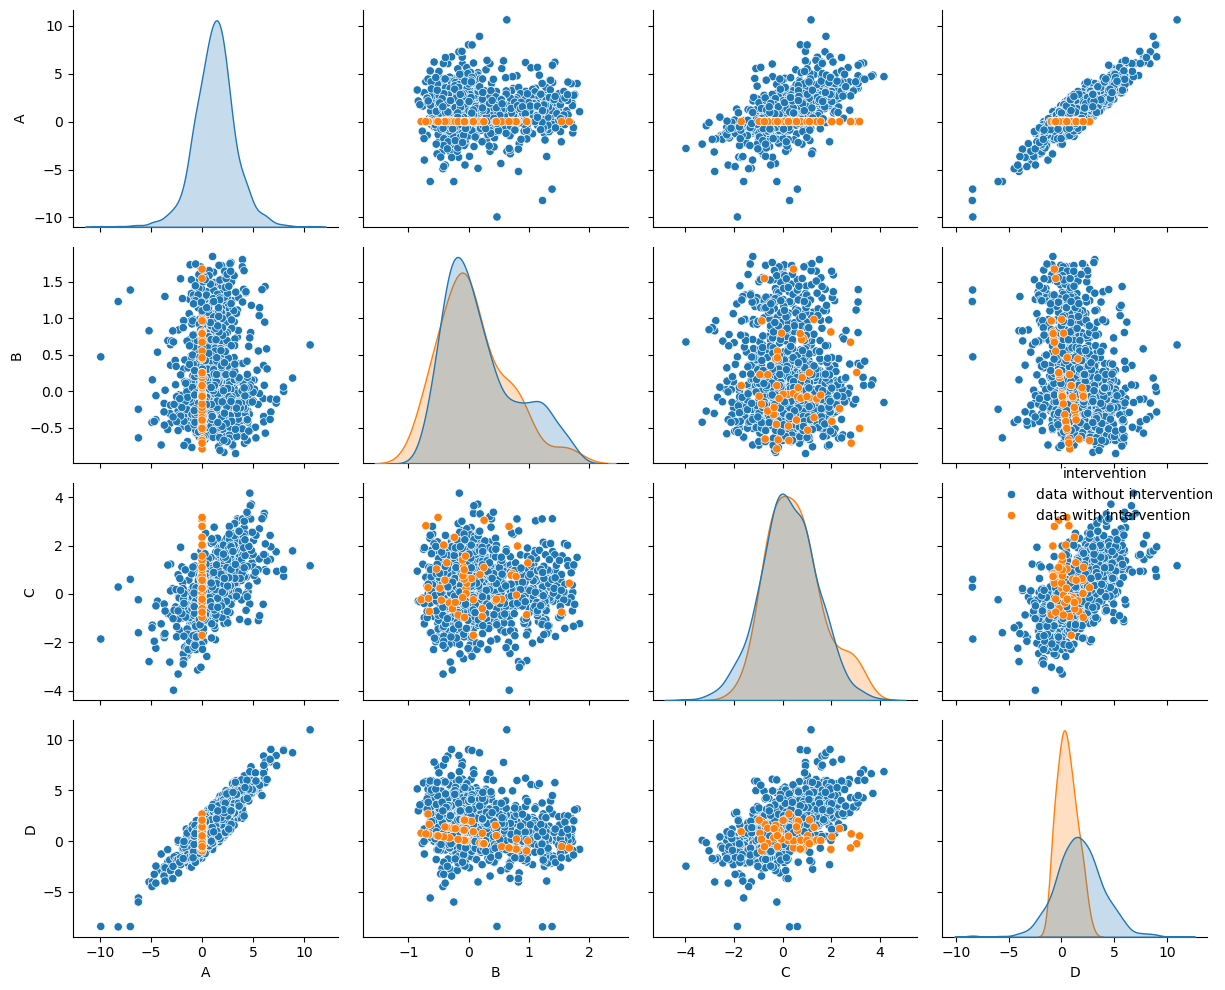

In [12]:
# combine the two datasets and add a label column
combined = pd.concat([
    df.assign(intervention='data without intervention'),
    df_new.assign(intervention='data with intervention')
], axis=0)

# plot pairplot with hue
sns.pairplot(
    combined,
    hue='intervention',
    diag_kind='kde',
    diag_kws={'common_norm': False}   # normalize each KDE separately
)
plt.tight_layout()
plt.show()